##WEEK 2+3##
analyzes e-waste by country and correlation between recycling / not reported e-waste

Dataset Preview:
           Mineral                       Country  2023  2030  2035  2040
0  Copper - Mining                         Chile  5311  5211  4551  4053
1  Copper - Mining  Democratic Republic of Congo  2678  3183  2623  2145
2  Copper - Mining                          Peru  2644  2377  2064  1067
3  Copper - Mining                         China  1865  2128  2037  1856
4  Copper - Mining                        Russia   960  1215  1100  1019


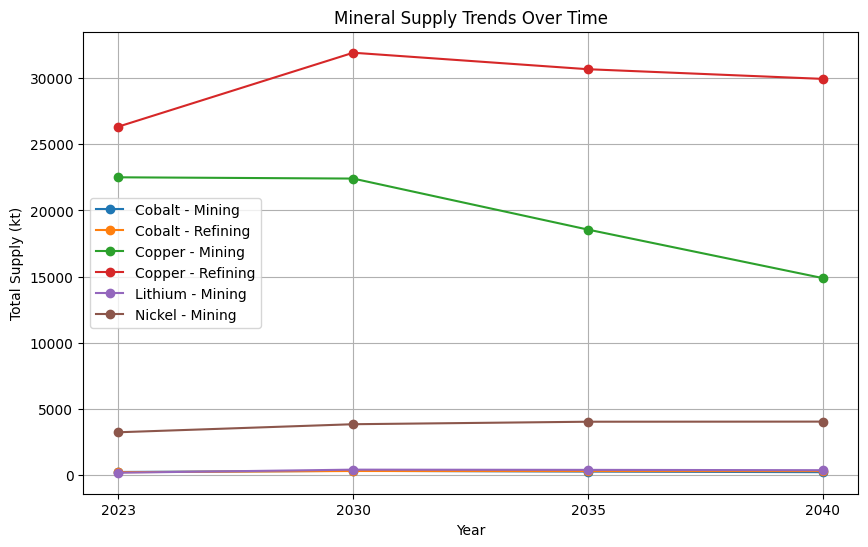

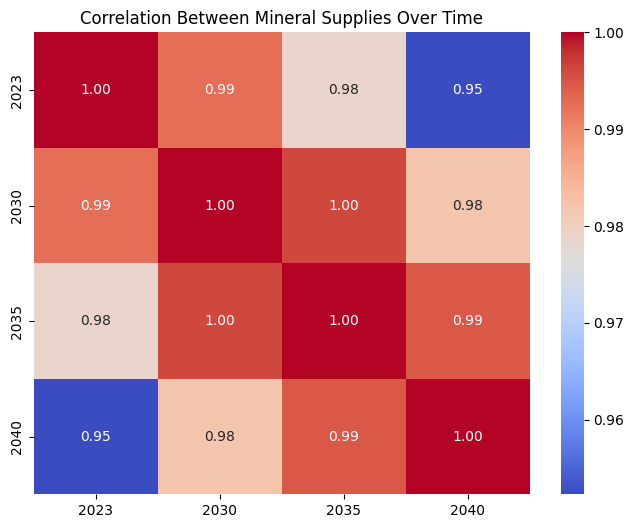

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

df = pd.read_csv("/content/Total_Mineral_Supply_Data.csv")

# Display first few rows
print("Dataset Preview:")
print(df.head())

# Convert year columns to numeric (ignore errors for non-numeric values)
year_columns = ["2023", "2030", "2035", "2040"]
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')

# Aggregate total supply by mineral
df_mineral = df.groupby("Mineral")[year_columns].sum()

# Plot supply trends by mineral
plt.figure(figsize=(10, 6))
for mineral in df_mineral.index:
    plt.plot(year_columns, df_mineral.loc[mineral], marker='o', label=mineral)

plt.xlabel("Year")
plt.ylabel("Total Supply (kt)")
plt.title("Mineral Supply Trends Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Explore correlations between different minerals
plt.figure(figsize=(8, 6))
sns.heatmap(df_mineral.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Mineral Supplies Over Time")
plt.show()


In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from google.colab import files

df = pd.read_csv("/content/Total_Mineral_Supply_Data.csv")


# Standardize country names
df["Country"] = df["Country"].replace({
    "Democratic Republic of Congo": "Dem. Rep. Congo"
})

# Count occurrences of each country as a top supplier
country_counts = df["Country"].value_counts()

# Get a list of minerals supplied by each country
country_minerals = df.groupby("Country")["Mineral"].apply(lambda x: ', '.join(set(x))).to_dict()

# Load country coordinates for mapping
country_coords = {
    "Chile": [-35.6751, -71.5430],
    "Dem. Rep. Congo": [-4.0383, 21.7587],
    "China": [35.8617, 104.1954],
    "Russia": [61.5240, 105.3188],
    "Indonesia": [-0.7893, 113.9213],
    "Australia": [-25.2744, 133.7751],
    "Canada": [56.1304, -106.3468],
    "Peru": [-9.1900, -75.0152]
}

# Create a Base Map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add Country Markers
for country, count in country_counts.items():
    if country in country_coords:
        minerals = country_minerals.get(country, "Unknown")  # Get minerals for country

        popup_text = f"""
        <b>{country}</b><br>
        <b>Supplies:</b> {minerals}<br>
        <b>Top Supplier Count:</b> {count} times
        """

        folium.CircleMarker(
            location=country_coords[country],
            radius=count * 3,  # Scale marker size by occurrence
            popup=folium.Popup(popup_text, max_width=300),
            color='red' if count >= 5 else 'blue' if count >= 3 else 'green',
            fill=True,
            fill_color='red' if count >= 5 else 'blue' if count >= 3 else 'green'
        ).add_to(m)

# Save and Display the Map
m.save("mineral_supplier_map.html")
print("Map saved as mineral_supplier_map.html")


Map saved as mineral_supplier_map.html


time series analysis of future demand?


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from google.colab import files

# Upload the CSV files manually
uploaded = files.upload()

# Read the datasets
mineral_supply_file = "Total_Mineral_Supply_Data.csv"
country_data_file = "country_data.csv"

df_minerals = pd.read_csv(mineral_supply_file)
df_countries = pd.read_csv(country_data_file)

# Standardize country names
df_minerals["Country"] = df_minerals["Country"].replace({
    "Democratic Republic of Congo": "Dem. Rep. Congo"
})
df_countries["Country"] = df_countries["Country"].replace({
    "Democratic Republic of Congo": "Dem. Rep. Congo"
})

# Use the correct E-Waste column name
ewaste_column = "E-WASTE GENERATED (MILLION KG)"


Saving Total_Mineral_Supply_Data.csv to Total_Mineral_Supply_Data (4).csv
Saving country_data.csv to country_data (3).csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

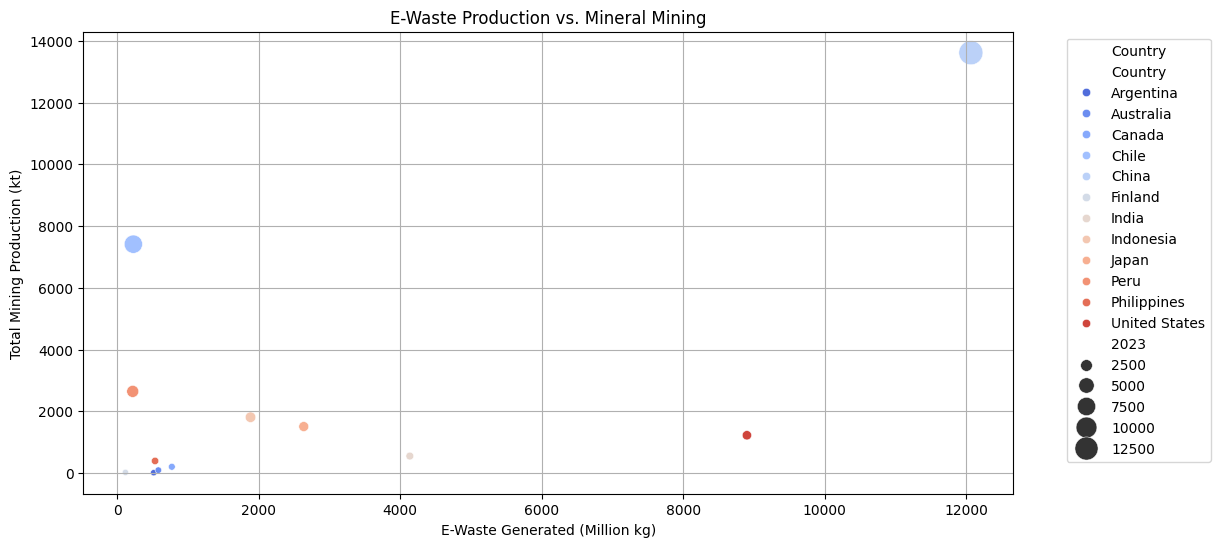

In [ ]:

### Comparing E-Waste Production vs. Key Mineral Supply
df_merged = df_countries[["Country", ewaste_column]].merge(
    df_minerals.groupby("Country")[["2023"]].sum().reset_index(),
    on="Country", how="left"
).dropna()

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=df_merged[ewaste_column],
    y=df_merged["2023"],
    hue=df_merged["Country"],
    size=df_merged["2023"], sizes=(20, 300), palette="coolwarm"
)
plt.xlabel("E-Waste Generated (Million kg)")
plt.ylabel("Total Mining Production (kt)")
plt.title("E-Waste Production vs. Mineral Mining")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<ipython-input-9-6e54155e1e92>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


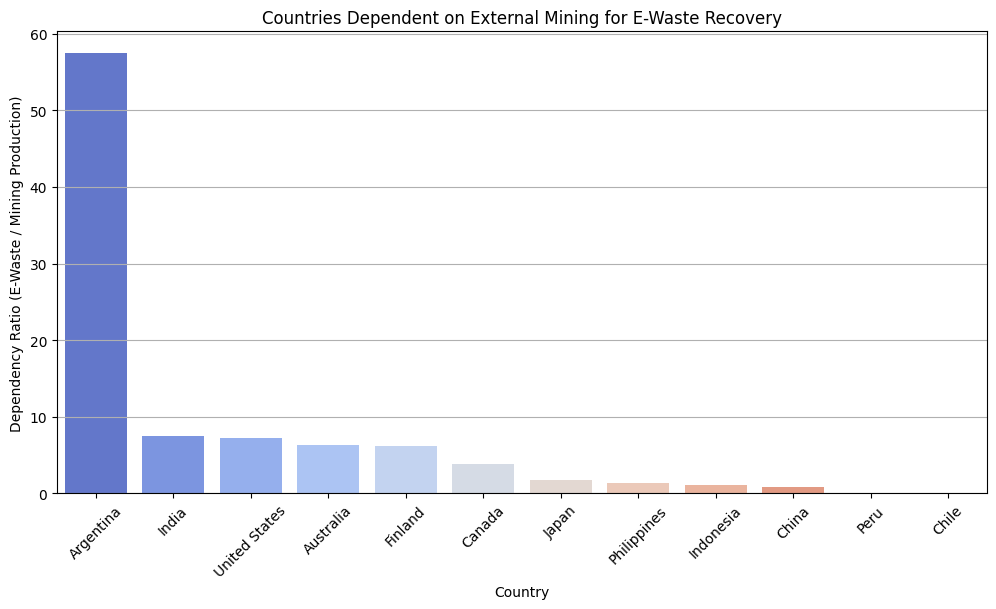

In [ ]:


### Countries Dependent on External Mining
df_merged["Dependency Ratio"] = df_merged[ewaste_column] / df_merged["2023"]

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Country", y="Dependency Ratio",
    data=df_merged.sort_values(by="Dependency Ratio", ascending=False),
    palette="coolwarm"
)
plt.xlabel("Country")
plt.ylabel("Dependency Ratio (E-Waste / Mining Production)")
plt.title("Countries Dependent on External Mining for E-Waste Recovery")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

<ipython-input-10-071a47560a67>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


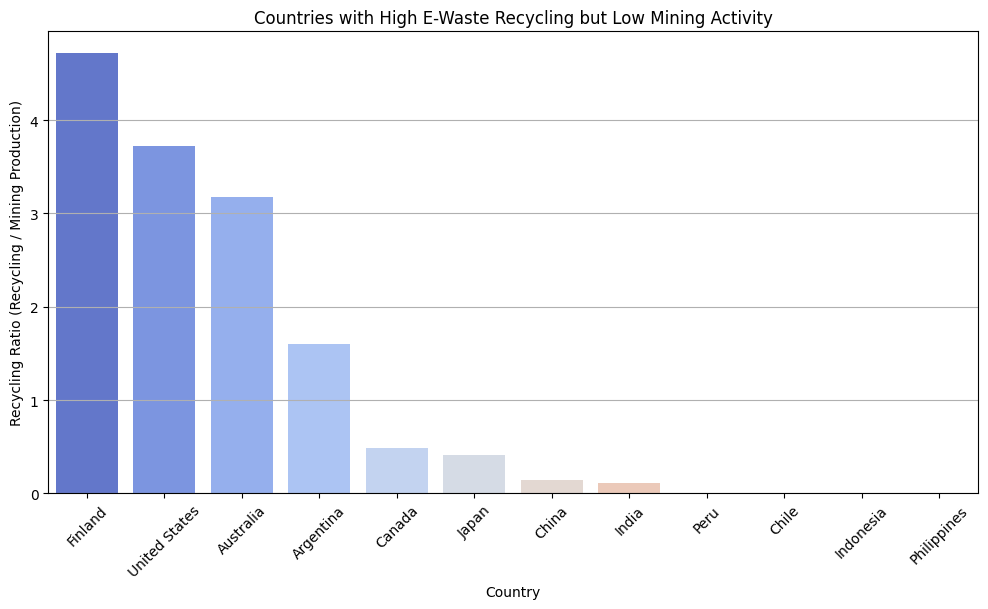

In [ ]:


### Countries with High Recycling but Low Mining

recycling_column = "E-WASTE DOCUMENTED AS FORMALLY COLLECTED AND RECYCLED (MILLION KG)"

df_recycling = df_countries[["Country", recycling_column]].merge(
    df_minerals.groupby("Country")[["2023"]].sum().reset_index(),
    on="Country", how="left"
).dropna()

df_recycling["Recycling Ratio"] = df_recycling[recycling_column] / df_recycling["2023"]

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Country", y="Recycling Ratio",
    data=df_recycling.sort_values(by="Recycling Ratio", ascending=False),
    palette="coolwarm"
)
plt.xlabel("Country")
plt.ylabel("Recycling Ratio (Recycling / Mining Production)")
plt.title("Countries with High E-Waste Recycling but Low Mining Activity")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

In [ ]:


### Mapping Mining vs. E-Waste Production

country_coords = {
    "China": [35.8617, 104.1954],
    "United States": [37.0902, -95.7129],
    "Japan": [36.2048, 138.2529],
    "India": [20.5937, 78.9629],
    "Germany": [51.1657, 10.4515],
    "Brazil": [-14.2350, -51.9253],
    "Indonesia": [-0.7893, 113.9213]
}

m = folium.Map(location=[20, 0], zoom_start=2)

for country, coord in country_coords.items():
    if country in df_countries["Country"].values:
        ewaste = df_countries[df_countries["Country"] == country][ewaste_column].values[0]
        folium.CircleMarker(
            location=coord, radius=ewaste / 500,  # Scale size
            popup=f"{country}\nE-Waste: {ewaste}M kg",
            color="blue", fill=True, fill_color="blue"
        ).add_to(m)

# Add mining countries
for country, coord in country_coords.items():
    if country in df_minerals["Country"].values:
        mining = df_minerals[df_minerals["Country"] == country]["2023"].sum()
        folium.CircleMarker(
            location=coord, radius=mining / 1000,  # Scale size
            popup=f"{country}\nMining: {mining} kt",
            color="red", fill=True, fill_color="red"
        ).add_to(m)

m.save("ewaste_vs_mining_map.html")